In [55]:
import os
import numpy as np
from tqdm import tqdm

import torch
import torchvision.utils as tvu
import torch.nn.functional as F
import torchvision.transforms as transforms

from models.diffusion_new import ConditionalModel as CModel
from models.diffusion_new import Model
from functions.process_data import *
from functions.denoising_step import guided_ddpm_steps, guided_ddim_steps, ddpm_steps, ddim_steps

import matplotlib.pyplot as plt
from einops import rearrange
from mpl_toolkits.axes_grid1 import ImageGrid
import math
import pickle

from copy import deepcopy

In [23]:
import pickle
file = '/home/thanhngp/Diffusion-based-PINN/experiments/kmflow_re1000_rs256_ddim_log/recons_u3232_t240_r30_lam0.0/sample_batch0/metric_log_run_0_it0.pkl'
#file = '/home/thanhngp/Diffusion-based-PINN/experiments/kmflow_re1000_rs256_ddim_recons_conditional_log/guided_recons_u3232_t240_r30_w0.0/sample_batch0/metric_log_run_0_it0.pkl'
# Open the .pkl file for reading in binary mode
with open(file, 'rb') as f:
    # Load the object from the file
    data_2 = pickle.load(f)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
cpu_loss = [t.cpu().item() for t in data_2['l2 loss']]
cpu_residual = [t.cpu().item() for t in data_2['residual loss']]

# Update the data dictionary with CPU tensor values
data_2['l2 loss'] = cpu_loss
data_2['residual loss'] = cpu_residual

# Convert dictionary to DataFrame
df_2 = pd.DataFrame(data_2)

# Print the DataFrame
df_2.head()

,l2 loss,residual loss
0,3.871670,62354.464844
1,3.780756,61396.250000
2,3.688907,60235.113281
3,3.596197,58873.335938
4,3.502672,57313.175781


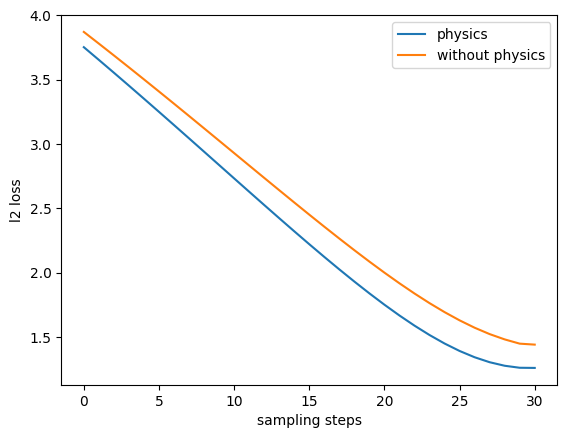

In [29]:
plt.plot(df['l2 loss'],label='physics')
plt.plot(df_2['l2 loss'],label='without physics')
plt.ylabel('l2 loss')
plt.xlabel('sampling steps')
plt.legend()
plt.show()

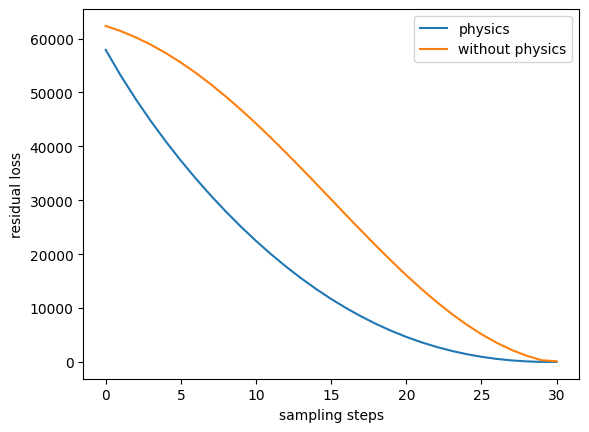

In [30]:
plt.plot(df['residual loss'],label='physics')
plt.plot(df_2['residual loss'],label='without physics')
plt.ylabel('residual loss')
plt.xlabel('sampling steps')
plt.legend()
plt.show()

In [13]:
import pandas as pd
import numpy as np
# Convert to pandas DataFrame
data

{'l2 loss': [tensor(3.7530, device='cuda:0'),
  tensor(3.6542, device='cuda:0'),
  tensor(3.5545, device='cuda:0'),
  tensor(3.4538, device='cuda:0'),
  tensor(3.3524, device='cuda:0'),
  tensor(3.2502, device='cuda:0'),
  tensor(3.1474, device='cuda:0'),
  tensor(3.0441, device='cuda:0'),
  tensor(2.9405, device='cuda:0'),
  tensor(2.8367, device='cuda:0'),
  tensor(2.7329, device='cuda:0'),
  tensor(2.6292, device='cuda:0'),
  tensor(2.5259, device='cuda:0'),
  tensor(2.4233, device='cuda:0'),
  tensor(2.3215, device='cuda:0'),
  tensor(2.2210, device='cuda:0'),
  tensor(2.1221, device='cuda:0'),
  tensor(2.0251, device='cuda:0'),
  tensor(1.9304, device='cuda:0'),
  tensor(1.8387, device='cuda:0'),
  tensor(1.7506, device='cuda:0'),
  tensor(1.6667, device='cuda:0'),
  tensor(1.5878, device='cuda:0'),
  tensor(1.5149, device='cuda:0'),
  tensor(1.4489, device='cuda:0'),
  tensor(1.3909, device='cuda:0'),
  tensor(1.3421, device='cuda:0'),
  tensor(1.3034, device='cuda:0'),
  tensor(

In [12]:
df

array({'l2 loss': [tensor(3.7530, device='cuda:0'), tensor(3.6542, device='cuda:0'), tensor(3.5545, device='cuda:0'), tensor(3.4538, device='cuda:0'), tensor(3.3524, device='cuda:0'), tensor(3.2502, device='cuda:0'), tensor(3.1474, device='cuda:0'), tensor(3.0441, device='cuda:0'), tensor(2.9405, device='cuda:0'), tensor(2.8367, device='cuda:0'), tensor(2.7329, device='cuda:0'), tensor(2.6292, device='cuda:0'), tensor(2.5259, device='cuda:0'), tensor(2.4233, device='cuda:0'), tensor(2.3215, device='cuda:0'), tensor(2.2210, device='cuda:0'), tensor(2.1221, device='cuda:0'), tensor(2.0251, device='cuda:0'), tensor(1.9304, device='cuda:0'), tensor(1.8387, device='cuda:0'), tensor(1.7506, device='cuda:0'), tensor(1.6667, device='cuda:0'), tensor(1.5878, device='cuda:0'), tensor(1.5149, device='cuda:0'), tensor(1.4489, device='cuda:0'), tensor(1.3909, device='cuda:0'), tensor(1.3421, device='cuda:0'), tensor(1.3034, device='cuda:0'), tensor(1.2759, device='cuda:0'), tensor(1.2603, device='c

In [56]:
def make_image_grid(images, ncols=1):
    # assume images in the shape of (N, T, H, W)
    t, h, w = images.shape
    images = images.detach().cpu().numpy()
    b = t // ncols
    fig = plt.figure(figsize=(8., 8.))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(b, ncols),  # creates 2x2 grid of axes
                     )

    for ax, im_no in zip(grid, np.arange(b*ncols)):
        # Iterating over the grid returns the Axes.
        ax.imshow(images[im_no, :, :], cmap='twilight', vmin=-23, vmax=23)
        ax.axis('off')
    # plt.savefig(out_path, bbox_inches='tight')
    #plt.close()
    plt.show()

def slice2sequence(data):
    data = rearrange(data[:, 1:2], 't f h w -> (t f) h w')
    return data

In [104]:
home_dir = '/home/thanhngp/Diffusion-based-PINN/experiments/'
path = os.path.join(home_dir,'kmflow_re1000_rs256_ddim_recons_conditional_log/guided_recons_u3232_t240_r30_w0.0/sample_batch0/sample_arr_run_0_it0.npy')

In [ ]:
/home/thanhngp/Diffusion-based-PINN/experiments/kmflow_re1000_rs256_ddim_log/recons_u3232_t240_r30_lam0.0/sample_batch0/sample_arr_run_0_it0.npy

In [105]:
path = os.path.join(home_dir,'kmflow_re1000_rs256_ddim_log/recons_u3232_t240_r30_lam0.0/sample_batch0/sample_arr_run_0_it0.npy')

In [106]:
x = np.load(path).astype(np.float32)
x = torch.as_tensor(x , dtype=torch.float32).unsqueeze(0)
print(f'data shape: {x.shape}')

#flattened_ref_data = []

# for i in range(x.shape[0]):
#for j in range(x.shape[1] - 2):
#    flattened_ref_data.append(x[0, j:j + 3, ...])
#    # flattened_sampled_data.append(sampled_data[i, j:j + 3, ...])
#    # mask_lst.append(mask)
#flattened_ref_data = torch.stack(flattened_ref_data, dim=0)

print(f'data shape: {x.shape}')

data shape: torch.Size([1, 20, 256, 256])
data shape: torch.Size([1, 20, 256, 256])


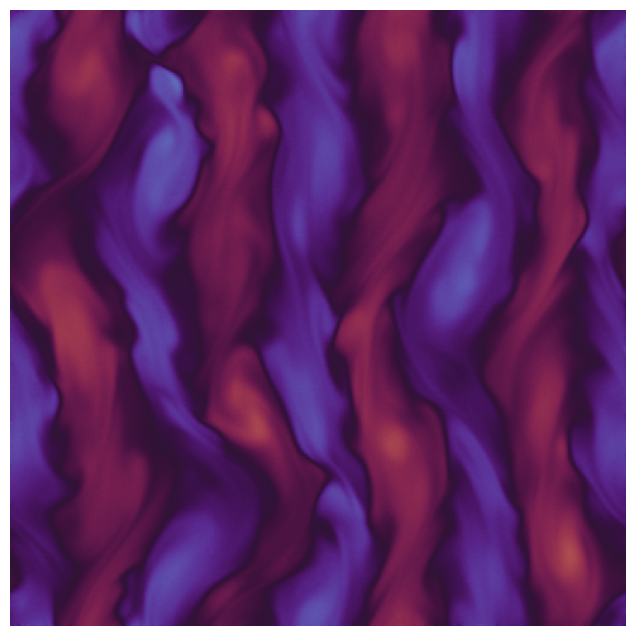

In [107]:
make_image_grid(slice2sequence(x))

In [111]:
sample_path = "./train_ddpm/data/kmflow_sampled_data_irregnew.npz"
data_kw = 'u3232'
path = './data/kf_2d_re1000_256_40seed.npy'

In [112]:
def load_flow_data(path, stat_path=None):
    # load flow data from path
    data = np.load(path)   # [N, T, h, w]

    print('Original data shape:', data.shape)
    data_mean, data_scale = np.mean(data[:-4]), np.std(data[:-4])
    print(f'Data range: mean: {data_mean} scale: {data_scale}')
    data = data[-4:, ...].copy().astype(np.float32)   # only take the test set
    data = torch.as_tensor(data, dtype=torch.float32)
    flattened_data = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]-2):
            flattened_data.append(data[i, j:j+3, ...])
    flattened_data = torch.stack(flattened_data, dim=0)
    print(f'data shape: {flattened_data.shape}')
    return flattened_data, data_mean.item(), data_scale.item()

In [113]:
data, _, _ = load_flow_data(path)

Original data shape: (40, 320, 256, 256)
Data range: mean: -2.2703574131810456e-08 scale: 4.786944389343262
data shape: torch.Size([1272, 3, 256, 256])


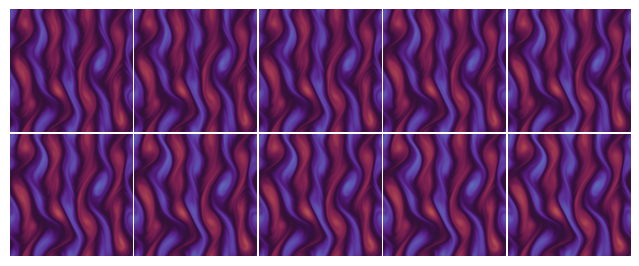

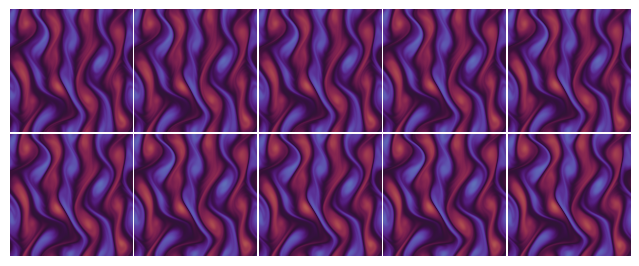

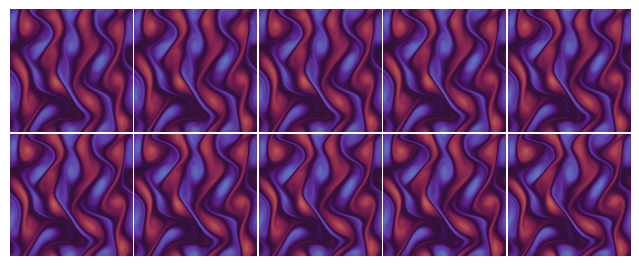

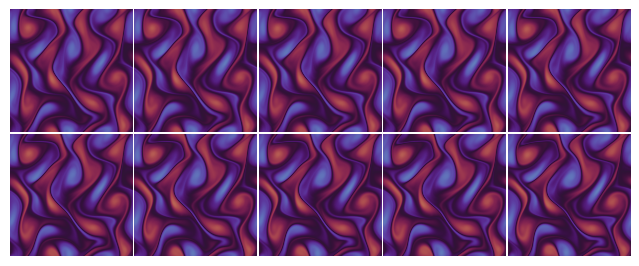

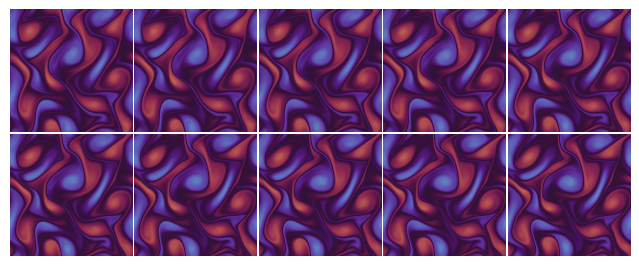

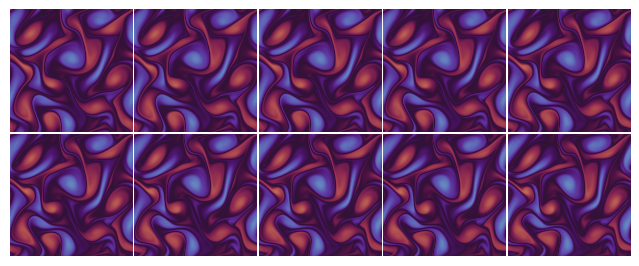

In [117]:
# high resolution data
for i in range(6):
    make_image_grid(slice2sequence(data[10*i:10*(i+1),...]),ncols=5)

In [60]:
with np.load(sample_path, allow_pickle=True) as f:
    sampled_data = f[data_kw][-4:, ...].copy().astype(np.float32)

In [87]:
sampled_data = torch.as_tensor(sampled_data, dtype=torch.float32)
print(sampled_data.size())

flattened_sampled_data = []
for i in range(sampled_data.shape[0]):
        for j in range(sampled_data.shape[1]-2):
            # flattened_ref_data.append(ref_data[i, j:j + 3, ...])
            #flattened_sampled_data.append(sampled_data[i, j:j + 3, ...])
            flattened_sampled_data.append(sampled_data[i, j:j + 3, ...])
flattened_sampled_data = torch.stack(flattened_sampled_data, dim=0)


torch.Size([4, 320, 256, 256])


In [88]:
flattened_sampled_data.size()

torch.Size([1272, 3, 256, 256])

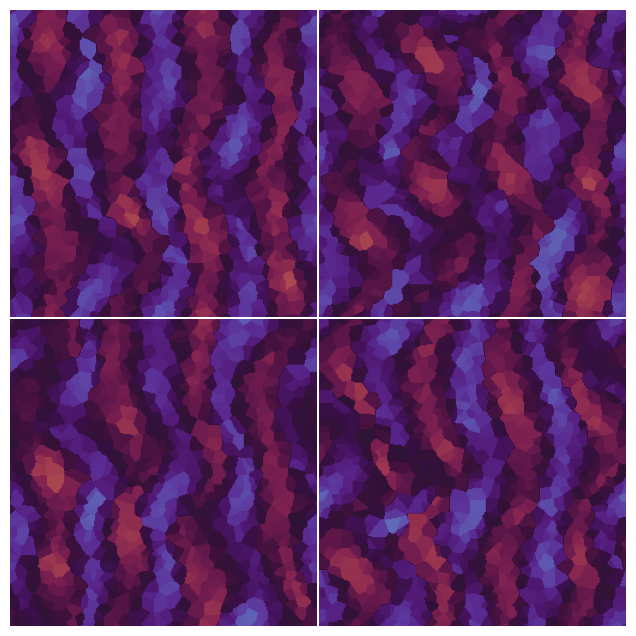

In [99]:
make_image_grid(slice2sequence(sampled_data[:,0:100,...]),ncols=2)

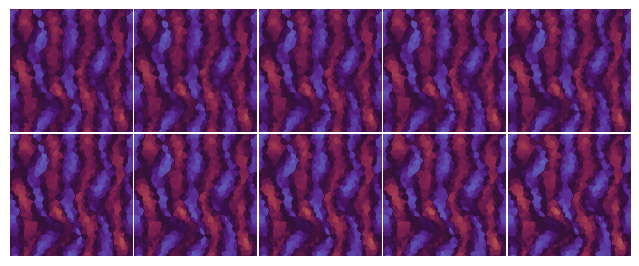

In [89]:
make_image_grid(slice2sequence(flattened_sampled_data[0:10,...]),ncols=5)